<center><font size="6"><b>Комп'ютерний практикум 3.

Лінійна регресія</b></font></center>

<center><img src="https://miro.medium.com/max/943/0*QG8dIxNTaBH7Qrxq" width="600"></center>

In [3]:
! pip install pandas matplotlib scikit-learn seaborn --quiet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##__Однофакторна лінійна регресія__

<center><img src="https://miro.medium.com/max/2400/1*A71zTD6_QqUzLhMKj1Rgiw.png" width="400"></center>

__Лінійна регресія__ дозволяє за величиною однієї ознаки (пояснювальна змінна $x$) знаходити середні (очікувані) значення іншої ознаки (пояснювана змінна $y$), зв'язаної з $x$ кореляційно.

Оскільки в дослідженнях конкретний вид взаємозв'язків невідомий, одне з головних завдань регресійного аналізу полягає у доборі відповідного виразу $\hat y=a_0+a_1x$, графік якого проходить через емпіричні точки (або досить близько до них) і таким чином зв'язує змінні $x$ і $y$.

Побудувати регресійну функцію означає підібрати оптимальні оцінки параметрів моделі - коефіцієнти $a_0$ та $a_1$. Найпоширеніший метод визначення коєфіцієнтів моделі є __Метод Найменших Квадратів (МНК)__, який мінімізує сумарний квадрат залишків моделі.
$$  \sum_{i=1}^n (y_i-\hat y_i)^2 =\sum_{i=1}^n u_i^2\to 0 ,$$
де $y_i=a_0+a_1x_i+u_i, i=\overline{1, n}$ - реальні статистичні дані цільової змінної, $u_i$ - шум (залишки моделі, які статистично наближені до помилки моделі), $n$ - кількість спостережень.
$$a_1=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i-\bar x)^2}\\a_0=\bar y-a_1\bar x$$


###__Коефіцієнт детермінації $R^2$__
<center><img src="https://learnche.org/pid/_images/ANOVA-graphically.png" width="400"></center>

>__RSS__ (residual sum of squares), __SSE__(sum of squared errors )
$$  \sum_{i=1}^n (y_i-\hat y_i)^2 =\sum_{i=1}^n u_i^2$$

>__RegSS__ (regression sum of square), __SSR__ (sum of squares regression ), __ESS__ (explained sum of squares)
$$  \sum_{i=1}^n (\hat y_i - \bar y_i)^2 $$

>__TSS__ (total sum of squares), __SST__(Sum of Squares Total)
$$  \sum_{i=1}^n (y_i - \bar y_i)^2 $$

$$TSS=RSS+SSR$$

>__Коефіцієнт детермінації__ - міра залежності варіації залежної змінної від варіації незалежних змінних. Приймає значення від $0$ до $1$. Чим ближче до $1$ тим залежність більш виражена, чим бличе до $0$ - навпаки
$$R^2=\frac{SSR}{TSS}=1-\frac{RSS}{TSS}$$



Завантажимо функцію `LinearRegression` пакету `sklearn`

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()
lm

LinearRegression()

Перевіримо, чи є лінійний зв'язок між факторами `highway-mpg` та `price`

In [8]:
X = df[['highway-mpg']]
Y = df['price']

Застосуємо модель лінійної регресії до обраних факторів

In [9]:
lm.fit(X,Y)

LinearRegression()

Спрогнозуємо перші 5 значень модельної змінної

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Знайдемо коефіцієнт $a_0$

In [11]:
lm.intercept_

np.float64(38423.3058581574)

Знайдемо коефіцієнт $a_1$

In [12]:
lm.coef_

array([-821.73337832])

Побудуємо розподіл точок та графік моделюючої функції

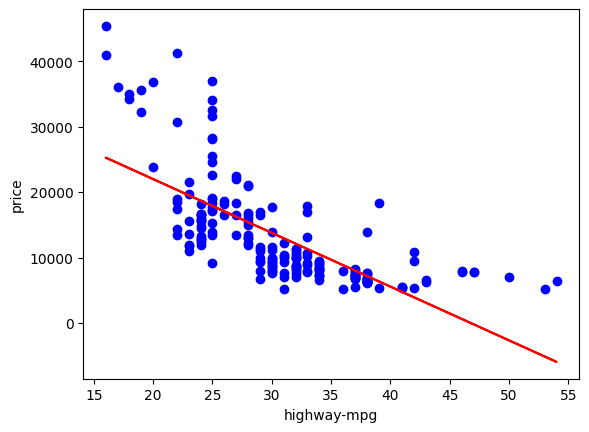

In [13]:
plt.scatter(X, Y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '-r')
plt.xlabel("highway-mpg")
plt.ylabel("price")
plt.show()

Скористаємося візуалізацією пакету `seaborn`

In [14]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

<module 'matplotlib.pyplot' from '/Users/dynokostya/Documents/Projects/big-data-labs/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

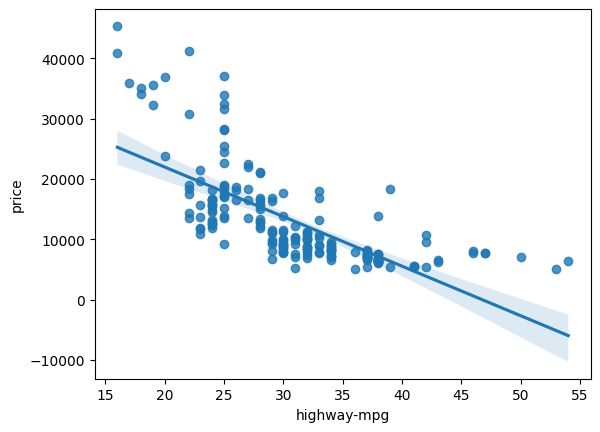

In [15]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt

Виведемо кореляційну матрицю

In [16]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Оцінимо коефіцієнт детермінації моделі

In [17]:
r_sq = lm.score(X,Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4965911884339176


Подивимось на графік залишків моделі

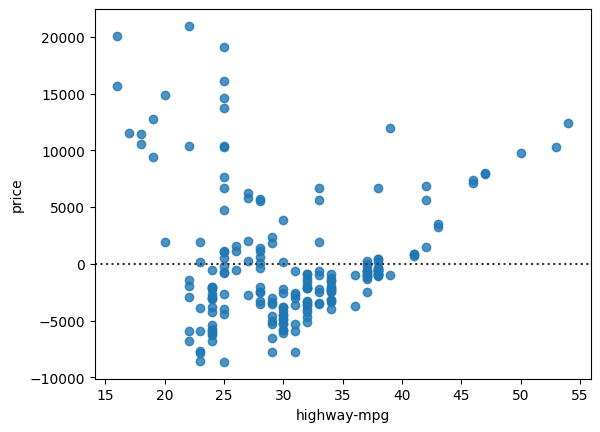

In [18]:
sns.residplot(data=df, x='highway-mpg', y='price')
plt.show()

>Оцінимо середньоквадратичну помилку за допомогою функції `mean_squared_error()` пакету `sklearn`

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mse = mean_squared_error(df['price'], Yhat)
print('Mean Squared Error is: ', mse)

Mean Squared Error is:  31635042.944639888


##__Багатофакторна лінійна регресія__

$$\hat y=a_0+a_1x_1+a_2x_2+...+a_mx_m$$

пердбачає дві або більше пояснювальних змінних

*Параметри (коефіцієнти)* моделі визначаються за методом МНК формулою

$$A=(X^TX)^{-1}X^TY$$
$A=\left( \begin{array}{ccc}a_0\\ a_1 \\ ...\\ a_m\end{array} \right)$, $X=\left( \begin{array}{ccc}1&x_{11}&x_{12}&...&x_{1m}\\ 1&x_{21}&x_{22}&...&x_{2m} \\ ...\\ 1&x_{n1}&x_{n2}&...&x_{nm}\end{array} \right)$, $Y=\left( \begin{array}{ccc}y_1\\ y_2 \\ ...\\ y_n\end{array} \right)$



> Оберемо для моделі наступні пояснювальні змінні
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>


In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Побудуємо багатофакторну модель

In [22]:
lm.fit(Z, df['price'])

LinearRegression()

Знайдемо коефіцієнт $a_0$

In [23]:
lm.intercept_

np.float64(-15806.62462632922)

Знайдемо коефіцієнти $a_1$, $a_2$, $a_3$, $a_4$

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

> Модель багатофакторної регресії має вигляд
$$
\hat y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + a_4 x_4
$$

<b>Price</b> = -15806.62462632922 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

Побудуємо кореляційну матрицю

In [25]:
CORR = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','price']].corr()
CORR

,horsepower,curb-weight,engine-size,highway-mpg,price
horsepower,1.000000,0.757976,0.822676,-0.804575,0.809575
curb-weight,0.757976,1.000000,0.849072,-0.794889,0.834415
engine-size,0.822676,0.849072,1.000000,-0.679571,0.872335
highway-mpg,-0.804575,-0.794889,-0.679571,1.000000,-0.704692
price,0.809575,0.834415,0.872335,-0.704692,1.000000


**Проведемо аналіз мультиколінеарності системи**

Знайдемо визначник кореляційної матриці

In [26]:
det = np.linalg.det(CORR)
det

np.float64(0.00397255179556267)

In [27]:
eigenvalues = np.linalg.eigvals(CORR)
condition_number = np.linalg.cond(CORR)

print("Власні значення:", eigenvalues)
print("Condition Number:", condition_number)

Власні значення: [4.17425134 0.372898   0.23910933 0.07952291 0.13421842]
Condition Number: 52.49117805150816


Власні значення, близькі до нуля, свідчать про сильну мультиколінеарність.

Condition Number > 30 може свідчити про наявність мультиколінеарності.

Знайдемо коефіцієнт детермінації

In [28]:
r_sq = lm.score(Z, df['price'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8093562806577457


Знайдемо модельні значення цільової змінної

In [29]:
Y_predict_multifit = lm.predict(Z)

In [30]:
Y_predict_multifit

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

Знайдемо середньоквадратичну помилку

In [31]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


##__Поліноміальна регресія__


<center><img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png" width="400"></center>

*Поліноміальна регресія* є однією з форм регресійного аналізу, в якому залежність між незалежною змінною $x$ і залежною змінною $y$ моделюється як поліном від $x$ ступеню $n$, де пояснювальні (незалежні) змінні, входять в модель, як поліноміального розширення «базових» змінних в певній степені, що дає можливість користуватися лінійним алгоритмом МНК але описувати "нелінійність" процесу.

<center><b>Квадратичний поліном (другого порядку)</b></center>
$$
\hat y = a_0 + a_1 x +a_2 x^2
$$

<center><b>Кубічний поліном (третього порядку)</b></center>
$$
\hat y = a_0 + a_1 x +a_2 x^2 +a_3 x^3\\\\
$$

<center><b>Поліноми вищого порядку</b>:</center>
$$
\hat y= a_0 + a_1 x +a_2 x^2 +a_3 x^3 +a_4 x^4+ ...\\\\
$$

Імпортуємо функцію `PolynomialFeatures()` пакету `sklearn`

In [32]:
from sklearn.preprocessing import PolynomialFeatures

Створимо новий масив змінних для поліноміальної моделі

In [33]:
X_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

In [34]:
X_poly

array([[2.70000e+01, 7.29000e+02, 1.96830e+04],
       [2.70000e+01, 7.29000e+02, 1.96830e+04],
       [2.60000e+01, 6.76000e+02, 1.75760e+04],
       [3.00000e+01, 9.00000e+02, 2.70000e+04],
       [2.20000e+01, 4.84000e+02, 1.06480e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [2.00000e+01, 4.00000e+02, 8.00000e+03],
       [2.90000e+01, 8.41000e+02, 2.43890e+04],
       [2.90000e+01, 8.41000e+02, 2.43890e+04],
       [2.80000e+01, 7.84000e+02, 2.19520e+04],
       [2.80000e+01, 7.84000e+02, 2.19520e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [2.20000e+01, 4.84000e+02, 1.06480e+04],
       [2.20000e+01, 4.84000e+02, 1.06480e+04],
       [2.00000e+01, 4.00000e+02, 8.00000e+03],
       [5.30000e+01, 2.80900e+03, 1.48877e+05],
       [4.30000e+01, 1.84900e+03, 7.95070e+04],
       [4.30000e+01, 1.84900e+03, 7.95070e+04],
       [4.10000e+01, 1.68100e+03, 6.8921

Застосуємо МНК для нового поліноміального масиву даних

In [35]:
polm = LinearRegression().fit(X_poly, Y)

Знайдемо коефіцієнт детермінації та коефіцієнти моделі

In [36]:
r_sq = polm.score(X_poly, Y)
print('coefficient of determination:', r_sq)
print('intercept:', polm.intercept_)
print('coefficients:', polm.coef_)

coefficient of determination: 0.6741946663906517
intercept: 137923.59375768848
coefficients: [-8.96543312e+03  2.04754306e+02 -1.55663829e+00]


In [37]:
from sklearn.pipeline import make_pipeline

Для коректної побудови графіків відсортуємо масиви даних за значеннями

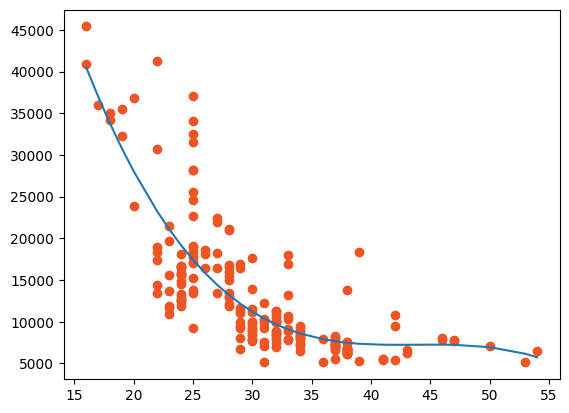

In [38]:
inds = X.values.ravel().argsort()        # Сортуємо значення Х та створюємо відповідний список індексів
x = X.values.ravel()[inds].reshape(-1,1) # створюємо список з Х відповідно до нового списку індексів
y = Y.values[inds]                       # створюємо список з Y відповідно до нового списку індексів
poly_model = make_pipeline(PolynomialFeatures(3),
                       LinearRegression())
poly_model.fit(x, y)

yfit = poly_model.predict(x)
plt.scatter(x, y,c='#ef5423', label='Scatter Plot')
plt.plot(x, yfit)

Знайдемо коефіцієнт детермінації за допомогою функції `r2_score` пакету `sklearn`

In [39]:
from sklearn.metrics import r2_score

In [40]:
r_squared = r2_score(y, yfit)
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906516


Знайдемо середньоквадратичну помилку

In [41]:
mean_squared_error(x, yfit)
31635042.944639888


31635042.944639888

##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP3.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [42]:
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Завдання №2
Перевірте дані на пропущені значення, та при необхідності, поповніть їх


In [43]:
df.isnull().sum()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

### Завдання №3
Побудуйте кореляційну матрицю для всього датафрейму, визначте найбільш суттєві змінні по кореляційному зв'язку. Зробіть висновки.


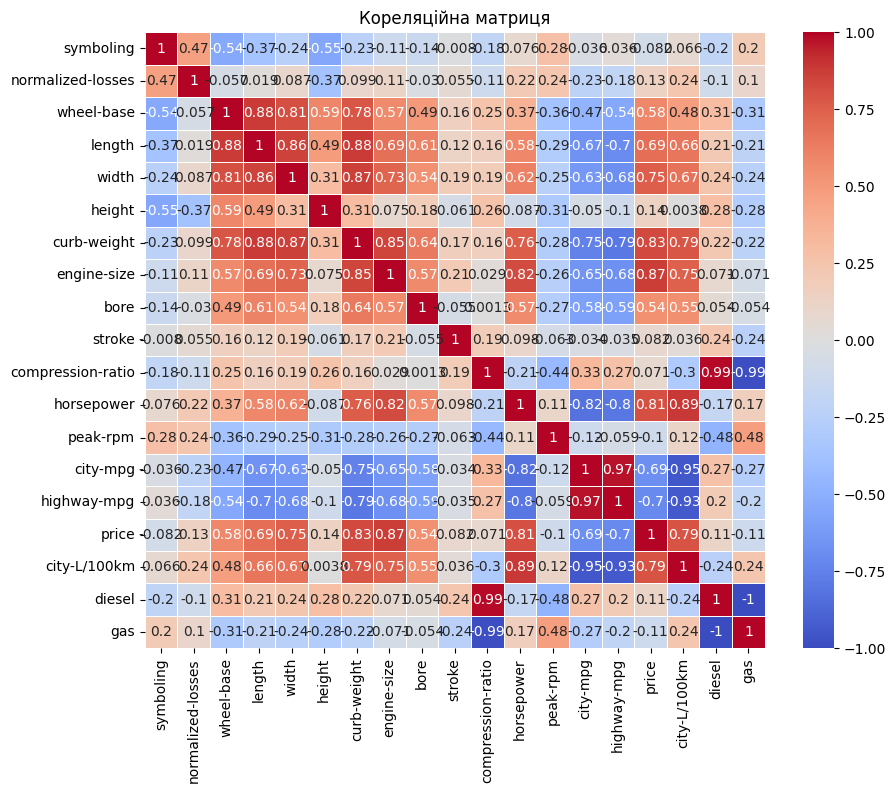

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
highway-mpg          0.704692
length               0.690628
city-mpg             0.686571
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
gas                  0.110326
peak-rpm             0.101616
symboling            0.082391
stroke               0.082267
compression-ratio    0.071107
Name: price, dtype: float64

In [45]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

corr_with_target = corr_matrix['price'].abs().sort_values(ascending=False)
corr_with_target


Найсильніші кореляції з ціною спостерігаються у таких змінних, як об'єм двигуна, вага автомобіля, потужність двигуна, витрата пального та ширина. Менш значущі кореляції мають довжина, колісна база та паливна ефективність, тоді як змінні на кшталт висоти і типу пального мають мінімальний вплив.

### Завдання №4
Оберіть дві змінні, відмінні від лекційного прикладу
* побудуйте рівняння лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$
* знайдіть $MSE$
* побудуйте графік з точковим розподілом та рівнянням лінії регресії
* побудуйте графік залишків моделі
* зробіть висновки по моделі, проаналізуйте графік залишків, як ви вважаєте чи присутня автокореляція в моделі, обгрунтуйте висновки

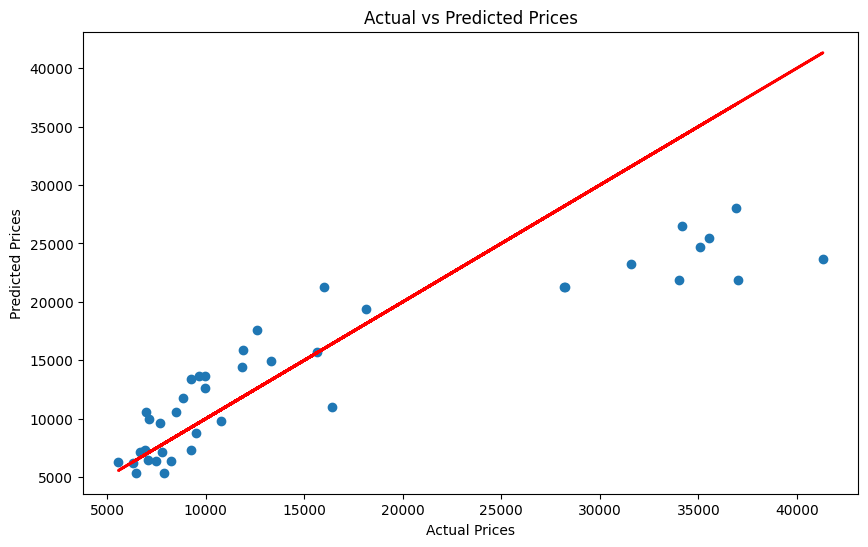

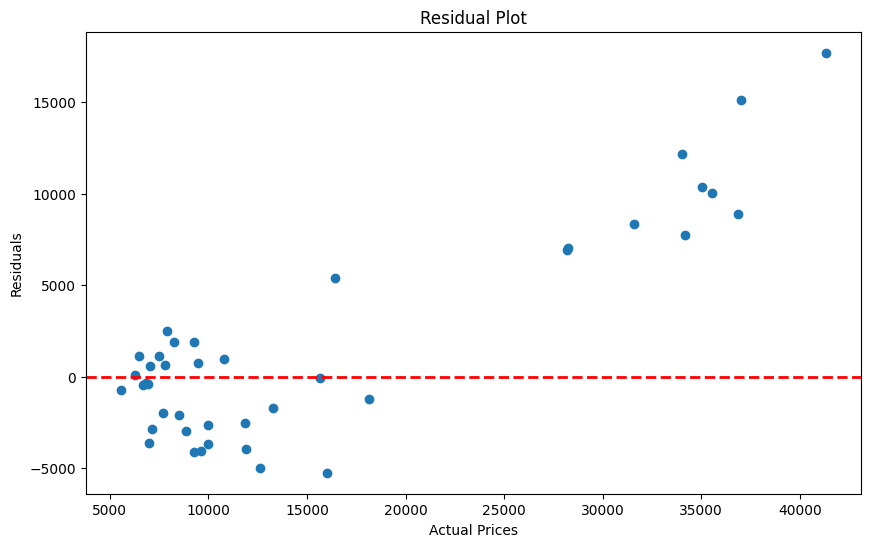

(array([9.97937728e+01, 1.04954975e+05]),
 np.float64(-93514.68066271505),
 0.7166344885836666,
 np.float64(34668855.92471421))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['horsepower', 'width']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

coefficients, intercept, r2, mse

Модель лінійної регресії між змінними horsepower, width і ціною показала R2=0.717, що свідчить про достатньо високу пояснювальну здатність. Однак графік залишків вказує на наявність відхилень для дорогих автомобілів, що може свідчити про деяку автокореляцію.

### Завдання №5
Оберіть 5 змінних, відмінних від лекційного прикладу
* побудуйте рівняння множинної лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$
* знайдіть $MSE$
* зробіть висновки по моделі, як ви вважаєте чи присутня мультиколінеарність в моделі, обгрунтуйте висновки

In [47]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'width', 'city-mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

coefficients, intercept, r2, mse

(array([ 2.73782255e+01,  1.38252090e+00,  8.13080853e+01,  5.28904932e+04,
        -6.37116520e+01]),
 np.float64(-50590.26754751917),
 0.7593896843564478,
 np.float64(29437895.68939582))

Коефіцієнти регресії: horsepower — 27.38, curb-weight — 1.38, engine-size — 81.31, width — 52890.49, city-mpg — -63.71. Перехоплення: -50590.27. 
R2=0.759, що вказує на високу пояснювальну здатність моделі. MSE = 29437895.69. Можлива наявність мультиколінеарності через значні коефіцієнти width та engine-size.

### Завдання №6
Оберіть дві змінних з завдання 4
* побудуйте поліноміальну регресію порядку 2
* побудуйте поліноміальну регресію порядку 3
* побудуйте поліноміальну регресію порядку 4
* знайдіть $R^2$ для всих моделей
* знайдіть $MSE$ для всих моделей
* побудуйте графік з точковим розподілом та поліноміальними функціями
* зробіть висновки по моделям, враховуючи і лінійну регресію в завданні 4, оберіть найкращу на вашу думку модель, обгрунтуйте висновки.

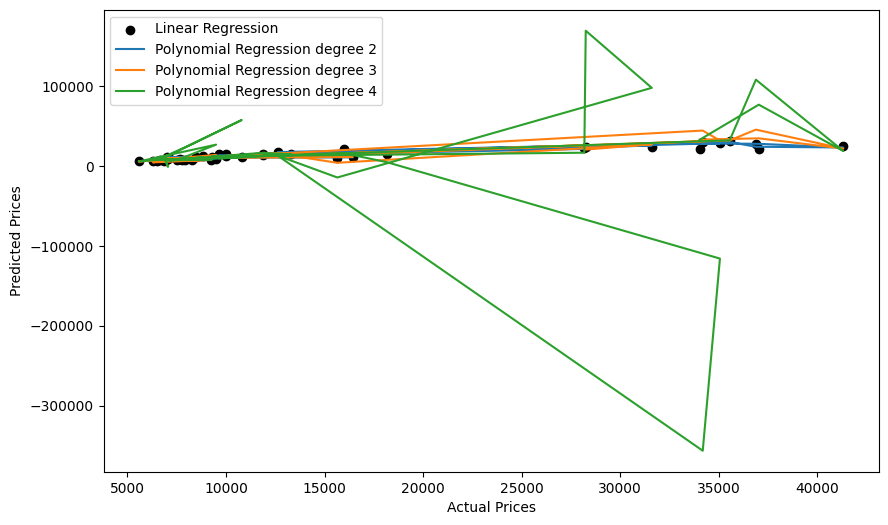

({2: 0.7958129758743077, 3: 0.809769458553919, 4: -41.00275754526203},
 {2: np.float64(24981623.507135596),
  3: np.float64(23274092.887700714),
  4: np.float64(5138901846.2373705)})

In [48]:
# Refit the linear regression model using the correct two variables
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the results of polynomial regression along with linear regression
degrees = [2, 3, 4]
r2_scores = {}
mse_scores = {}

plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), label='Linear Regression', color='black')

for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)
    
    r2_scores[degree] = r2_score(y_test, y_pred_poly)
    mse_scores[degree] = mean_squared_error(y_test, y_pred_poly)
    
    sorted_indices = np.argsort(X_test['horsepower'])
    plt.plot(y_test.values[sorted_indices], y_pred_poly[sorted_indices], label=f'Polynomial Regression degree {degree}')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

r2_scores, mse_scores

Найкраща модель — поліноміальна регресія 3-го ступеня, оскільки вона має найвище значення R2 і найнижче значення MSE.